In [47]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#read the data from drive
data=pd.read_csv(r"E:\School_DataSets\chip_dataset.csv")


In [49]:
data

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [50]:
data.tail()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00
4944,NVIDIA RTX 5880 Ada Generation,GPU,1/5/24,5,285,609,76300,1155.0,TSMC,NVIDIA,71810.0,71810.0,1122.00


## Explore the missingness in the dataset for categorical and numerical data


In [51]:
data.columns[data.isnull().sum()>0]

Index(['Release Date', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)',
       'Freq (GHz)', 'Foundry', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [52]:
#Exploring missingness with pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [53]:
data.shape

(4945, 13)

In [54]:
data.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

##### Several columns have missing values Release Date, TDP, Die size, Transistors, Frequency, Foundry, FP16, FP32, FP64.
##### use missingno library to identify any patterns in the data that could explain the missingness

In [55]:
!pip install missingno

In [56]:
import missingno as mn

<Axes: >

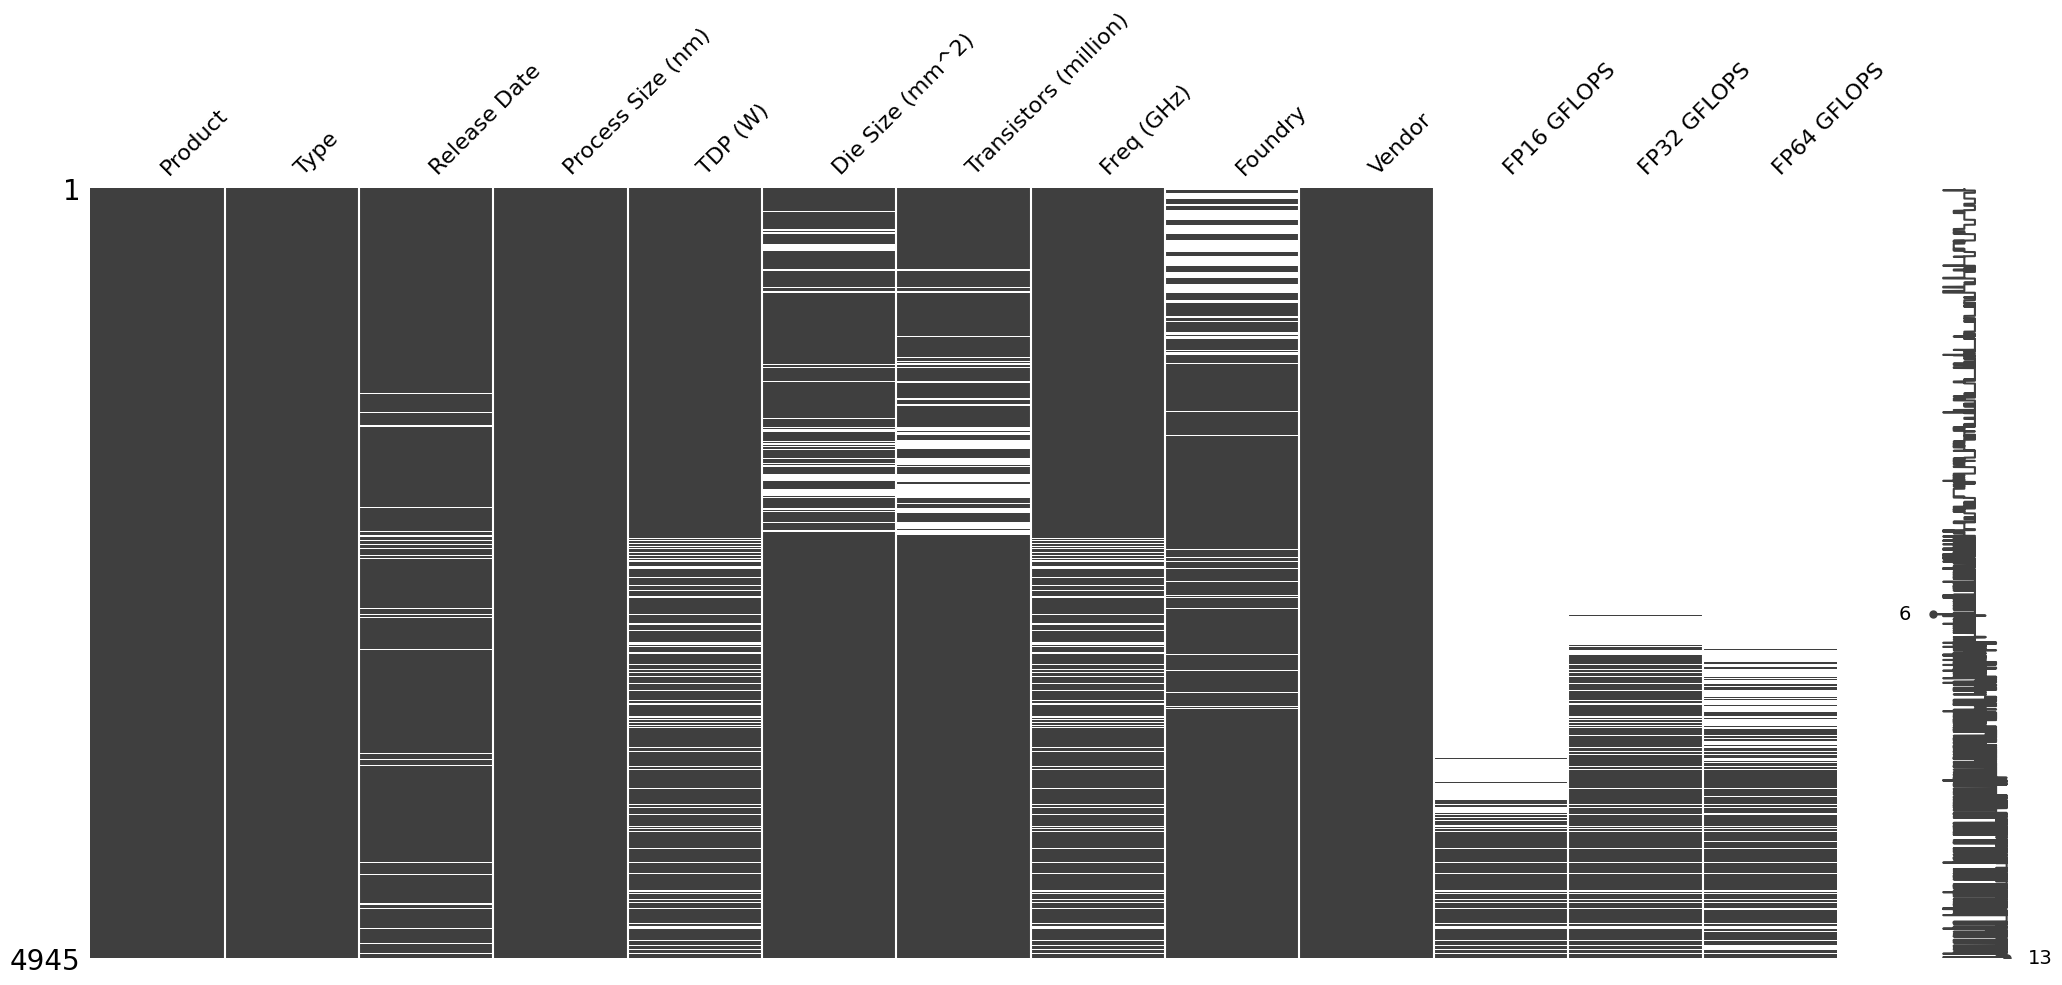

In [57]:
mn.matrix(data)

In [58]:
# Getting % of missingness
total_missing=data.isnull().sum().sort_values(ascending=False)
total_missing


FP16 GFLOPS              4145
FP64 GFLOPS              3667
FP32 GFLOPS              3260
Foundry                   615
Transistors (million)     555
TDP (W)                   437
Freq (GHz)                437
Die Size (mm^2)           352
Release Date              199
Product                     0
Type                        0
Process Size (nm)           0
Vendor                      0
dtype: int64

In [59]:
all_data=data.isnull().count().sort_values(ascending=False)
all_data

Product                  4945
Type                     4945
Release Date             4945
Process Size (nm)        4945
TDP (W)                  4945
Die Size (mm^2)          4945
Transistors (million)    4945
Freq (GHz)               4945
Foundry                  4945
Vendor                   4945
FP16 GFLOPS              4945
FP32 GFLOPS              4945
FP64 GFLOPS              4945
dtype: int64

In [60]:
percent_missing=total_missing/all_data
percent_missing

Die Size (mm^2)          0.071183
FP16 GFLOPS              0.838220
FP32 GFLOPS              0.659252
FP64 GFLOPS              0.741557
Foundry                  0.124368
Freq (GHz)               0.088372
Process Size (nm)        0.000000
Product                  0.000000
Release Date             0.040243
TDP (W)                  0.088372
Transistors (million)    0.112235
Type                     0.000000
Vendor                   0.000000
dtype: float64

In [61]:
missing_df=pd.concat([total_missing,percent_missing],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df

,total_missing,percentage_missing
variable,,
FP16 GFLOPS,4145,0.838220
FP64 GFLOPS,3667,0.741557
FP32 GFLOPS,3260,0.659252
Foundry,615,0.124368
Transistors (million),555,0.112235
TDP (W),437,0.088372
Freq (GHz),437,0.088372
Die Size (mm^2),352,0.071183
Release Date,199,0.040243


In [62]:
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

C:\Users\User\AppData\Local\Temp\ipykernel_5440\3122555864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage


,total_missing,percentage_missing
variable,,
FP16 GFLOPS,4145,83.822042
FP64 GFLOPS,3667,74.155713
FP32 GFLOPS,3260,65.925177
Foundry,615,12.436805
Transistors (million),555,11.223458
TDP (W),437,8.837209
Freq (GHz),437,8.837209
Die Size (mm^2),352,7.118301
Release Date,199,4.024267


### Q1 :Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.


#### Step 1, drop unnecessary columns

In [63]:
#drop the last 3 columns since more that 50% missing data
data.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'],axis=1,inplace=True)

In [64]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD


#### Imputing release date missingness

In [65]:
#convert to date time data type
data['Release Date'] = pd.to_datetime(data['Release Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_5440\2226359446.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Release Date'] = pd.to_datetime(data['Release Date'])


In [66]:
#use back filling to impute missing release dates
data['Release Date'] = data['Release Date'].fillna(method='bfill')

C:\Users\User\AppData\Local\Temp\ipykernel_5440\821078819.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Release Date'] = data['Release Date'].fillna(method='bfill')


In [67]:
data.isnull().sum()

Product                    0
Type                       0
Release Date               0
Process Size (nm)          0
TDP (W)                  437
Die Size (mm^2)          352
Transistors (million)    555
Freq (GHz)               437
Foundry                  615
Vendor                     0
dtype: int64

#### Dealing with missingness in the TDP (w), Transistors.... First plot distributions of each to identify best imputation strategy

In [68]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor'],
      dtype='object')

In [69]:
#convert all object type columns to numerical columns
data[['TDP (W)','Die Size (mm^2)','Transistors (million)','Process Size (nm)']]=data[['TDP (W)','Die Size (mm^2)','Transistors (million)','Process Size (nm)']].apply(pd.to_numeric,errors='coerce')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4887 non-null   float64       
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 386.5+ KB


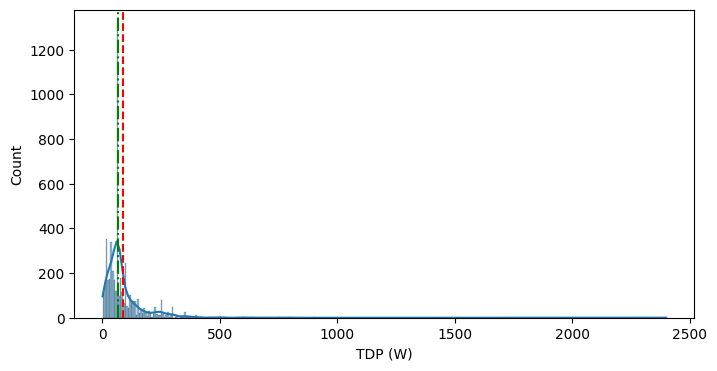

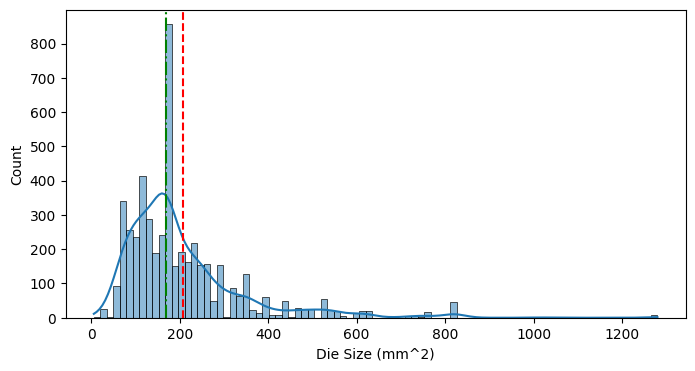

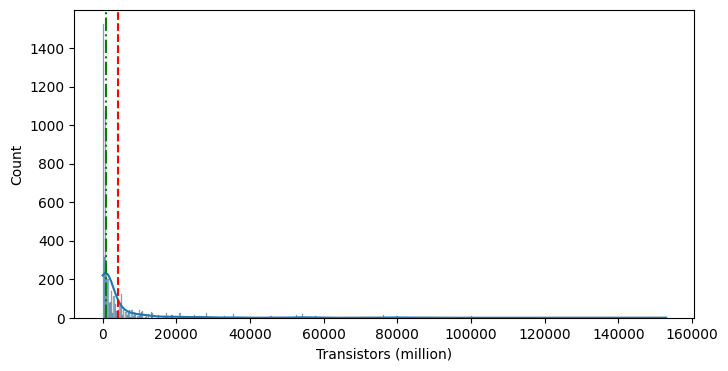

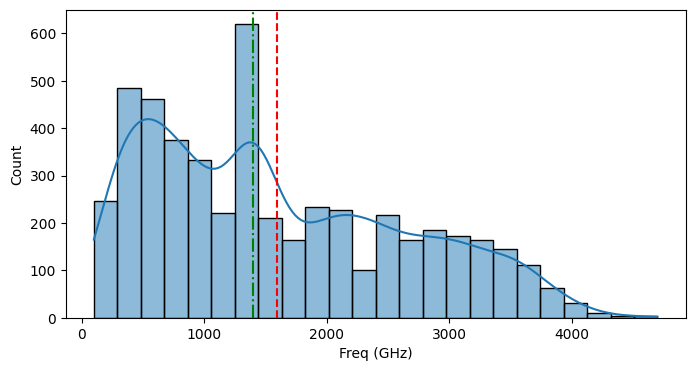

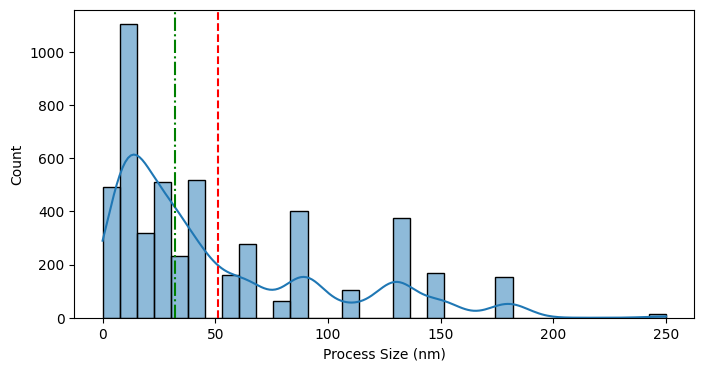

In [90]:
numerical_cols=['TDP (W)','Die Size (mm^2)','Transistors (million)','Freq (GHz)','Process Size (nm)']

for num_col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data,x=num_col,kde=True)

    col_mean = data[num_col].mean()
    col_median = data[num_col].median()

    plt.axvline(col_mean, color='red', linestyle='--',)
    plt.axvline(col_median, color='green', linestyle='-.')
    

#### For all numerical missing data, impute using median values as they are better measures of central tendancy

In [91]:
data['TDP (W)'].fillna((data['TDP (W)'].median()), inplace=True) 
data['Die Size (mm^2)'].fillna((data['Die Size (mm^2)'].median()), inplace=True) 
data['Transistors (million)'].fillna((data['Transistors (million)'].median()), inplace=True) 
data['Freq (GHz)'].fillna((data['Freq (GHz)'].median()), inplace=True) 
data['Process Size (nm)'].fillna((data['Process Size (nm)'].median()), inplace=True)
data['Foundry'].fillna(data['Foundry'].mode()[0], inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_5440\2098885939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TDP (W)'].fillna((data['TDP (W)'].median()), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_5440\2098885939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [92]:
data.isnull().sum()

Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (GHz)               0
Foundry                  0
Vendor                   0
dtype: int64

## Drop non-consequntial fields


In [74]:
#done above

## Transform temporal data to their corrrect format (date time)


In [75]:
#done above

## Perfom a full EDA and demonstrate the validity of the following assumption

#### Moore's Law holds especially in GPUs

In [76]:
#Moore's law= the no. of transistors doubles every year
#plot graph of transistors(million) over the years
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180.0,60.0,120.0,37.0,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180.0,63.0,120.0,37.0,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180.0,66.0,120.0,37.0,1200.0,TSMC,AMD


C:\Users\User\AppData\Local\Temp\ipykernel_5440\101165064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPU_df['Year'] = CPU_df['Release Date'].dt.year


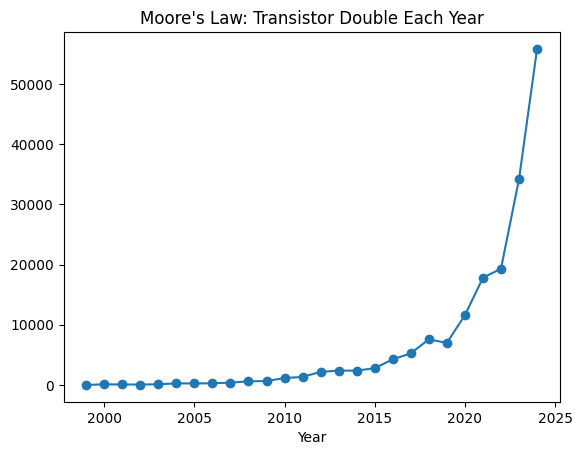

In [77]:
CPU_df=data.loc[data['Type']=='GPU']
CPU_df['Year'] = CPU_df['Release Date'].dt.year
CPU_df.groupby('Year')['Transistors (million)'].mean().plot(kind='line', marker='o', title="Moore's Law: Transistor Double Each Year")
plt.show()

#### Dannard Scaling is still valid in general.

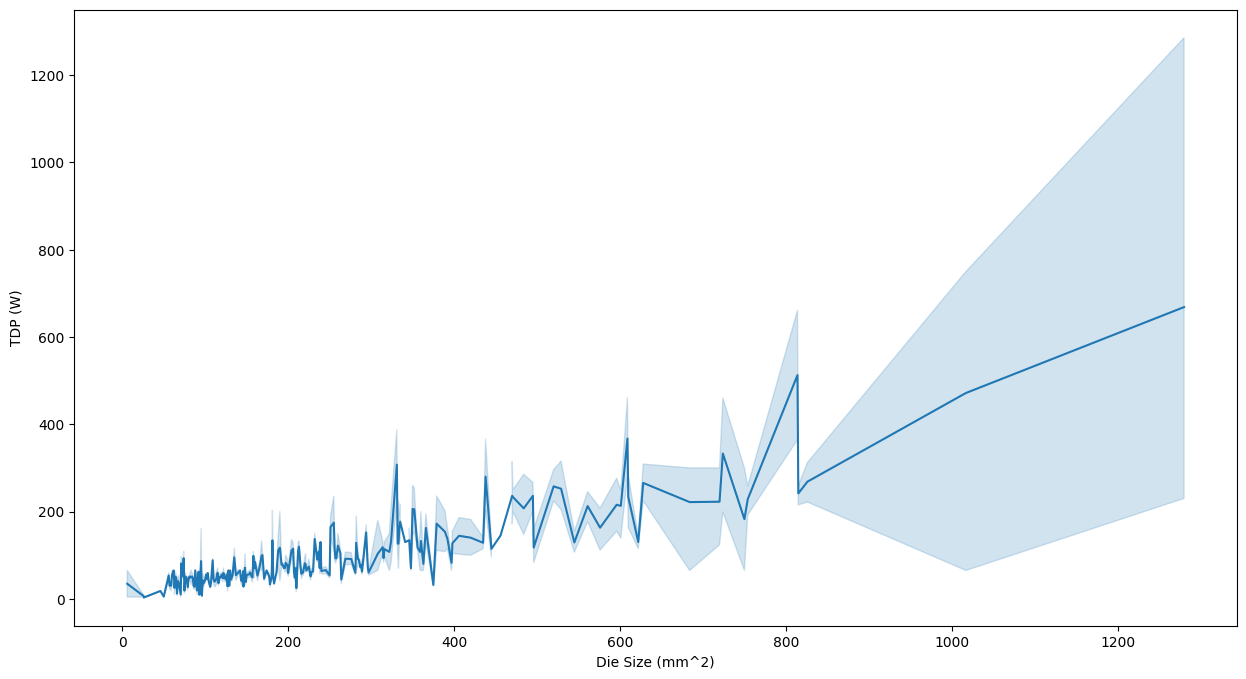

In [78]:
#as transistors get smaller they become more efficient- generate less heat
#plot size of transistors against heat generated
plt.figure(figsize=(15,8))
sns.lineplot(x='Die Size (mm^2)', y='TDP (W)', data=data) 
plt.show()

#### As you can see from the plot, the bigger the die size, the more heat is generated by the transistor. Meaning, smaller transistors are more energy efficient that larger ones. The Dannard Scaling Law is evident in the plot

#### CPUs have higher frequencies, but GPUs are catching up.

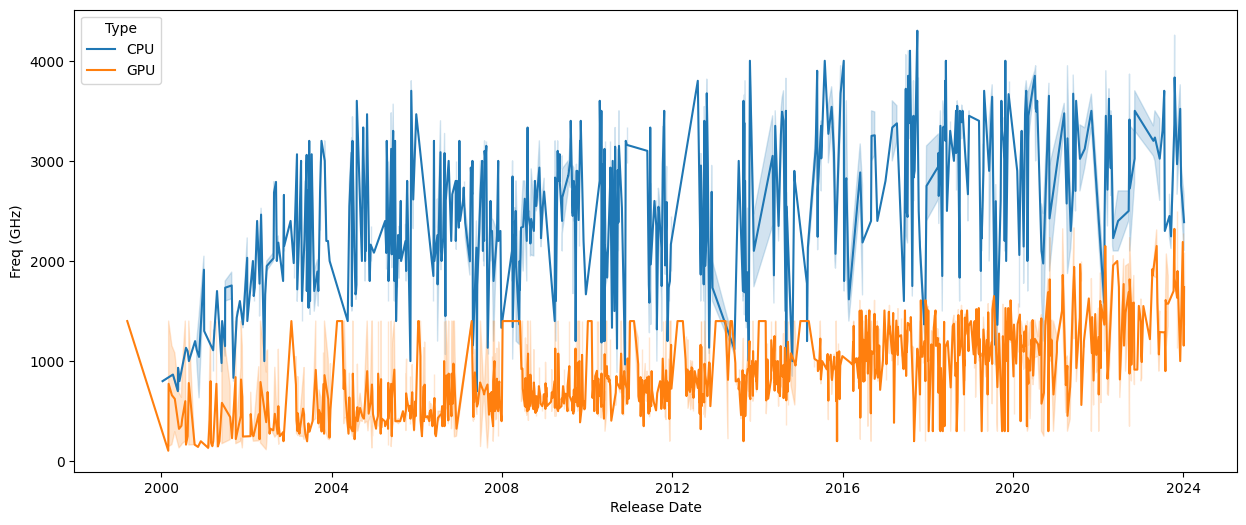

In [79]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Release Date',y='Freq (GHz)', data=data,hue='Type') 
plt.show()

#### GPU performance doubles every 1.5 years.

#### High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

#### Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

#### TSMC makes the highest number of chips in the world

### Calculate and visualized the correlation among the features

In [93]:
numeric_data = data[["Process Size (nm)","TDP (W)","Die Size (mm^2)","Transistors (million)","Freq (GHz)"]]
correlation_matrix = numeric_data.corr()

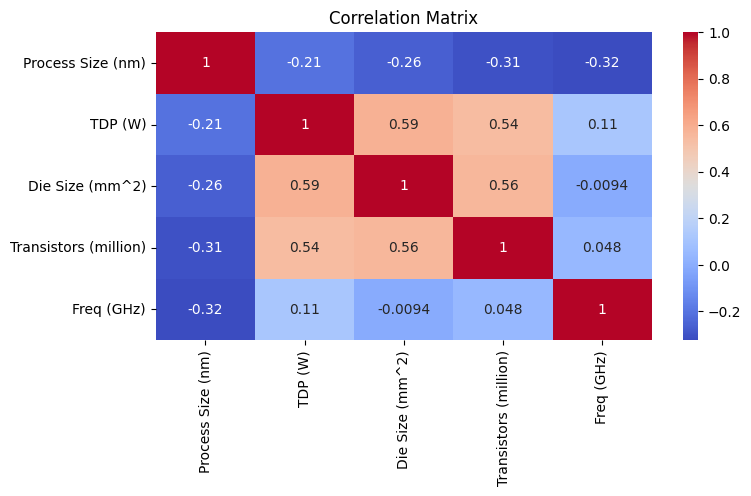

In [94]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [82]:
#first let us find all columns with categorical data
#categorical=data.select_dtypes(include=[object])
#categorical.head()

In [83]:
#missing_vars=[]
#for x in missing_df.index:
   # if x in categorical.columns:
        #missing_vars.append(x)
#missing_vars

## Encoding of Categorical Data

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   float64       
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 386.5+ KB


In [84]:
# find out how many categorical features we have
categorical=data.select_dtypes(include=object)

In [99]:
categorical.columns

Index(['Product', 'Type', 'Foundry', 'Vendor'], dtype='object')

In [107]:
for col_name, col_data in categorical.items():
    unique_values = col_data.nunique()
    print(f"Column '{col_name}' has {unique_values} unique values.")

Column 'Product' has 4567 unique values.
Column 'Type' has 2 unique values.
Column 'Foundry' has 10 unique values.
Column 'Vendor' has 9 unique values.


#### We can perform one hot encoding for the type since this will only add 1 extra column, and it is also good for nominal data

In [108]:
#import scikitlearn
from sklearn.preprocessing import OneHotEncoder

In [111]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [112]:
ohetransform=ohe.fit_transform(data[['Type']])

In [113]:
data=pd.concat([data,ohetransform],axis=1).drop(columns=['Type'])

In [114]:
data.head()

,Product,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,Type_CPU,Type_GPU
0,AMD Athlon 1000,2000-06-05,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,1.0,0.0
1,AMD Athlon 1000,2000-10-31,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,1.0,0.0
2,AMD Athlon 1100,2000-08-14,180.0,60.0,120.0,37.0,1100.0,TSMC,AMD,1.0,0.0
3,AMD Athlon 1133,2000-10-31,180.0,63.0,120.0,37.0,1133.0,TSMC,AMD,1.0,0.0
4,AMD Athlon 1200,2000-10-31,180.0,66.0,120.0,37.0,1200.0,TSMC,AMD,1.0,0.0


#### How to encoding product feature, which has over 1000 unique values???